In [1]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt

etc = pd.read_csv('youtube_trot4.csv',encoding='utf-8')


In [2]:
len(etc)

459

In [3]:
etc.head(3)

,Unnamed: 0,ID,Comment
0,0,김바리,"죽어가는한국트로트다시일으킨게장윤정,박현빈아닌가,,"
1,1,arambae,와24살이라니....저어린나이에전국이본인노래로들썩이면어떤기분일까.
2,2,호호롤로로로이,"이러니,,도연우군이우리엄마장윤정이라고동네방네소문내고다니지ㅋㅋㅋㅋㅋㅋㅋㅋㅋ연우너무귀여..."


In [4]:
etc2=list(etc.Comment)
etc2[0:2]

['죽어가는한국트로트다시일으킨게장윤정,박현빈아닌가,,', '와24살이라니....저어린나이에전국이본인노래로들썩이면어떤기분일까.']

In [5]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['죽어가는한국트로트다시일으킨게장윤정박현빈아닌가']

In [6]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

In [7]:
import time
import datetime
start = time.time()

In [8]:
dataset = []
for i in range(len(clean_title)):
    dataset.append(twitter_tag.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))


sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times=times[0]
print(times)

0:00:48


In [9]:
from gensim import corpora, models 
import gensim

In [10]:
high_score_reviews = dataset

In [11]:
high_score_reviews = [[y for y in x if not len(y)==1]
                       for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [12]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews,dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

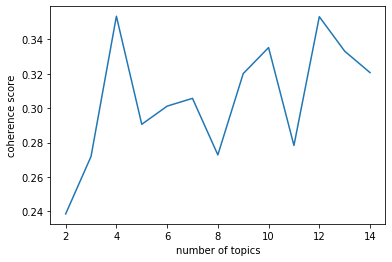

In [13]:
x = range(2,15)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [14]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

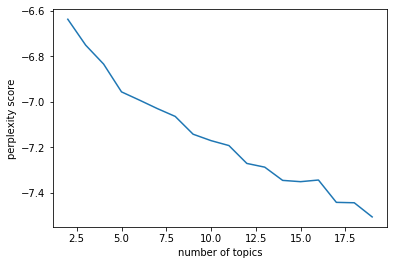

In [15]:
x=range(2,20)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [16]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4,alpha=0.2,id2word = dictionary)

In [17]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.071*"장윤정" + 0.053*"노래" + 0.019*"지금" + 0.014*"진짜" + 0.014*"윤정" + 0.014*"어머나" + 0.010*"그때" + 0.009*"생각" + 0.009*"요즘" + 0.008*"가수" + 0.008*"얼굴" + 0.007*"트로트" + 0.007*"주현미" + 0.006*"송가" + 0.006*"명곡" + 0.005*"시절" + 0.005*"사랑" + 0.005*"인생" + 0.004*"트롯" + 0.004*"연우"'),
 (1,
  '0.041*"어머나" + 0.034*"장윤정" + 0.030*"노래" + 0.015*"지금" + 0.015*"진짜" + 0.014*"얼굴" + 0.014*"가수" + 0.012*"트로트" + 0.010*"나이" + 0.009*"학년" + 0.009*"정말" + 0.008*"초딩" + 0.007*"완전" + 0.005*"가창력" + 0.005*"이스" + 0.005*"이곡" + 0.005*"가요" + 0.005*"엄마" + 0.005*"어른" + 0.005*"행사"'),
 (2,
  '0.032*"노래" + 0.023*"지금" + 0.022*"진짜" + 0.018*"어머나" + 0.015*"장윤정" + 0.014*"목소리" + 0.013*"트로트" + 0.009*"세월" + 0.008*"서프라이즈" + 0.008*"살이" + 0.007*"정도" + 0.006*"정말" + 0.006*"생각" + 0.006*"콧소리" + 0.006*"소리" + 0.006*"자체" + 0.006*"창법" + 0.006*"연우" + 0.006*"인기" + 0.005*"나이"'),
 (3,
  '0.024*"엄마" + 0.024*"트롯" + 0.022*"장윤정" + 0.021*"트로트" + 0.016*"어머나" + 0.015*"연우" + 0.015*"진짜" + 0.011*"노래" + 0.011*"사랑" + 0.009*"지금" + 0.009*"윤정" + 0.008*"최고" + 0.007*"서프라

In [18]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.032357  0.084130       1        1  30.984503
1     -0.083631 -0.053993       2        1  25.288221
3      0.057319  0.018680       3        1  22.909914
2      0.058669 -0.048817       4        1  20.817366, topic_info=    Term       Freq      Total Category  logprob  loglift
12    엄마  17.000000  17.000000  Default  30.0000  30.0000
204   트롯  17.000000  17.000000  Default  29.0000  29.0000
2    장윤정  83.000000  83.000000  Default  28.0000  28.0000
59   어머나  47.000000  47.000000  Default  27.0000  27.0000
6     노래  72.000000  72.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
13    연우   2.594759  14.482233   Topic4  -5.1624  -0.1500
18    당시   2.090957   6.921640   Topic4  -5.3782   0.3724
224   윤정   2.434244  17.790283   Topic4  -5.2262  -0.4196
1    박현빈   1.795330   4.850276   Topic4  -5.5307   0.5755
202   가수   2.194209  17.558159   Topic4  -5.3300  -0.5103

[261 rows x 6 columns], token_table=      Topic      Freq Term
term                      
92        1  0.354959   가사
92        2  0.177479   가사
92        3  0.354959   가사
92        4  0.177479   가사
202       1  0.341721   가수
...     ...       ...  ...
722       3  0.482589   후배
722       4  0.241294   후배
70        1  0.409883   히트
70        3  0.204941   히트
70        4  0.409883   히트

[345 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])